Use zipline to create the pandas DataFrame and Series objects to pass into alphalense.

This example uses the talib (Technical Analysis) library function Accumulate/Distribute Oscillator as a test signal.  The two global data objects are created with a zipline algo using the Dow 30 stocks as the universe and then passed to alphalens.  We can then determine if there is a suitable trading signal from this classic technical analysis indicator.

Visit Quantopian at https://www.quantopian.com

Learn about zipline at https://github.com/quantopian/zipline

Learn about alphalens at https://github.com/quantopian/alphalens

And for some more information visit my site at:
http://www.prokopyshen.com/zipline-talib-alphalens

In [1]:
# Get our notebook ready for zipline 
%matplotlib inline
%load_ext zipline

In [2]:
import pandas as pd
import talib
from zipline.api import symbol
import alphalens

In [3]:
# Create global variables to feed alphalens
dfPrice=pd.DataFrame()
seSig=pd.Series()

In [4]:
# Zipline algo

def initialize(context):
    context.iNDays=400   # How many days of data we want
    
    context.iADOFast=5   # talib AD Osc constant
    context.iADOSlow=14  # talib AD Osc constant
    
    # DJI 30
    context.secs=[]
    context.secs.append(symbol("AAPL")) # Apple
    context.secs.append(symbol("AXP")) # American Express
    context.secs.append(symbol("BA")) # Boeing
    context.secs.append(symbol("CAT")) # Caterpillar
    context.secs.append(symbol("CSCO")) # Cisco
    context.secs.append(symbol("CVX")) # Chevron
    context.secs.append(symbol("DD")) # E I du Pont de Nemours and Co
    context.secs.append(symbol("DIS")) # Disney
    context.secs.append(symbol("GE")) # General Electric
    context.secs.append(symbol("GS")) # Goldman Sachs
    context.secs.append(symbol("HD")) # Home Depot
    context.secs.append(symbol("IBM")) # IBM
    context.secs.append(symbol("INTC")) # Intel
    context.secs.append(symbol("JNJ")) # Johnson & Johnson
    context.secs.append(symbol("JPM")) # JPMorgan Chase
    context.secs.append(symbol("KO")) # Coca-Cola
    context.secs.append(symbol("MCD")) # McDonald's
    context.secs.append(symbol("MMM")) # 3M
    context.secs.append(symbol("MRK")) # Merck
    context.secs.append(symbol("MSFT")) # Microsoft
    context.secs.append(symbol("NKE")) # Nike
    context.secs.append(symbol("PFE")) # Pfizer
    context.secs.append(symbol("PG")) # Procter & Gamble
    context.secs.append(symbol("TRV")) # Travelers Companies Inc
    context.secs.append(symbol("UNH")) # UnitedHealth
    context.secs.append(symbol("UTX")) # United Technologies
    context.secs.append(symbol("V")) # Visa
    context.secs.append(symbol("VZ")) # Verizon
    context.secs.append(symbol("WMT")) # Wal-Mart
    context.secs.append(symbol("XOM")) # Exxon Mobil

def handle_data(context, data):
    global seSig   
    liSeries=[]  # Used to collect the series as we go

    # Get data
    dfP=data.history(context.secs,'price',context.iNDays,'1d')
    dfL=data.history(context.secs,'low',context.iNDays,'1d')
    dfH=data.history(context.secs,'high',context.iNDays,'1d')
    dfV=data.history(context.secs,'volume',context.iNDays,'1d')

    ixP=dfP.index  # This is the date 

    for S in context.secs:
        # Save our history for alphalens
        dfPrice[S.symbol]=dfP[S]
        
        # Normalize for tablib
        seP=dfP[S]/dfP[S].mean()
        seL=dfL[S]/dfL[S].mean()
        seH=dfH[S]/dfH[S].mean()
        seV=dfV[S]/dfV[S].mean()
        
        # Get our ta-value
        ndADosc=talib.ADOSC( \
            seP.values,seL.values,seH.values,seV.values, \
            context.iADOFast,context.iADOSlow)

        # alphalens requires that the Series used for the Signal 
        # have a MultiIndex consisting of date+symbol

        # Build a list of symbol names same length as our price data
        liW=[S.symbol]*len(ixP)
        # Make a tuple
        tuW=zip(ixP,liW)
        # Create the required MultiIndex
        miW=pd.MultiIndex.from_tuples(tuW,names=['date','sym'])
        # Create series
        seW=pd.Series(ndADosc,index=miW)
        # Save it for later
        liSeries.append(seW)

    # Now make the required series
    seSig=pd.concat(liSeries).dropna()

    return


In [5]:
# We only need to run zipline for one day.... not the whole period
# now run run zipline for last day in period of interest 
%zipline --start=2016-8-31 --end=2016-8-31  --capital-base=100000 

algo_volatility  algorithm_period_return alpha  \
2016-08-31 20:00:00+00:00            None                      0.0  None   

                           benchmark_period_return benchmark_volatility  beta  \
2016-08-31 20:00:00+00:00                -0.002376                 None  None   

                           capital_used  ending_cash  ending_exposure  \
2016-08-31 20:00:00+00:00           0.0     100000.0              0.0   

                           ending_value          ...            \
2016-08-31 20:00:00+00:00           0.0          ...             

                           short_exposure  short_value shorts_count  sortino  \
2016-08-31 20:00:00+00:00               0            0            0     None   

                           starting_cash  starting_exposure  starting_value  \
2016-08-31 20:00:00+00:00       100000.0                0.0             0.0   

                           trading_days  transactions treasury_period_return  
2016-08-31 20:00:00+00:00             1            []                 0.0158  

[1 rows x 38 columns]

In [6]:
# Lets take a look at what got built
print type(dfPrice),"length=",len(dfPrice)
print dfPrice.head(3)
print dfPrice.tail(3)

<class 'pandas.core.frame.DataFrame'> length= 400
                              AAPL     AXP       BA     CAT    CSCO      CVX  \
2015-02-02 00:00:00+00:00  114.690  80.397  139.925  76.110  25.737   99.351   
2015-02-03 00:00:00+00:00  114.709  81.963  140.958  79.010  26.015  102.601   
2015-02-04 00:00:00+00:00  115.589  81.845  140.844  77.155  25.603  101.496   

                               DD     DIS      GE       GS   ...       NKE  \
2015-02-02 00:00:00+00:00  69.017  90.686  23.237  172.155   ...    45.482   
2015-02-03 00:00:00+00:00  70.674  92.826  23.486  176.814   ...    46.190   
2015-02-04 00:00:00+00:00  71.069  99.909  23.189  175.382   ...    45.789   

                              PFE      PG      TRV      UNH      UTX       V  \
2015-02-02 00:00:00+00:00  30.302  80.991  102.197  105.907  112.184  63.044   
2015-02-03 00:00:00+00:00  30.656  81.780  103.624  106.421  114.407  64.143   
2015-02-04 00:00:00+00:00  30.975  81.628  104.298  106.529  113.348  65.402

In [13]:
print type(seSig),"length=",len(seSig)
print seSig.head(3)
print seSig.tail(3)
# Make sure out MultiIndex is date+symbol
print seSig.index[0]

<class 'pandas.core.series.Series'> length= 11610
date                       sym 
2015-02-20 00:00:00+00:00  AAPL   -20.694482
2015-02-23 00:00:00+00:00  AAPL   -21.610103
2015-02-24 00:00:00+00:00  AAPL   -21.178680
dtype: float64
date                       sym
2016-08-29 00:00:00+00:00  XOM    -65.675206
2016-08-30 00:00:00+00:00  XOM    -99.419735
2016-08-31 00:00:00+00:00  XOM   -115.905694
dtype: float64
(Timestamp('2015-02-20 00:00:00+0000', tz='UTC'), u'AAPL')


Returns Analysis


1      2      3
Ann. alpha                                     0.067  0.067  0.054
beta                                           0.008 -0.010 -0.000
Mean Period Wise Return Top Quantile (bps)     0.993  0.734  0.451
Mean Period Wise Return Bottom Quantile (bps) -2.601 -2.355 -2.243
Mean Period Wise Spread (bps)                  3.594  3.088  2.694

Information Analysis


1      2      3
IC Mean      0.011  0.010  0.002
IC Std.      0.191  0.192  0.195
t-stat(IC)   1.117  0.986  0.190
p-value(IC)  0.265  0.325  0.849
IC Skew     -0.023  0.028 -0.019
IC Kurtosis -0.200 -0.468 -0.374
Ann. IR      0.905  0.799  0.154

Turnover Analysis


1
Quantile 1 Mean Turnover   0.088
Quantile 2 Mean Turnover   0.192
Quantile 3 Mean Turnover   0.211
Quantile 4 Mean Turnover   0.173
Quantile 5 Mean Turnover   0.081

1
Mean Factor Rank Autocorrelation  0.968

/home/rproko01/pyfolio/local/lib/python2.7/site-packages/alphalens/plotting.py:700: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=2).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/home/rproko01/pyfolio/local/lib/python2.7/site-packages/alphalens/plotting.py:741: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=2).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/home/rproko01/pyfolio/local/lib/python2.7/site-packages/alphalens/plotting.py:700: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=3).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,)

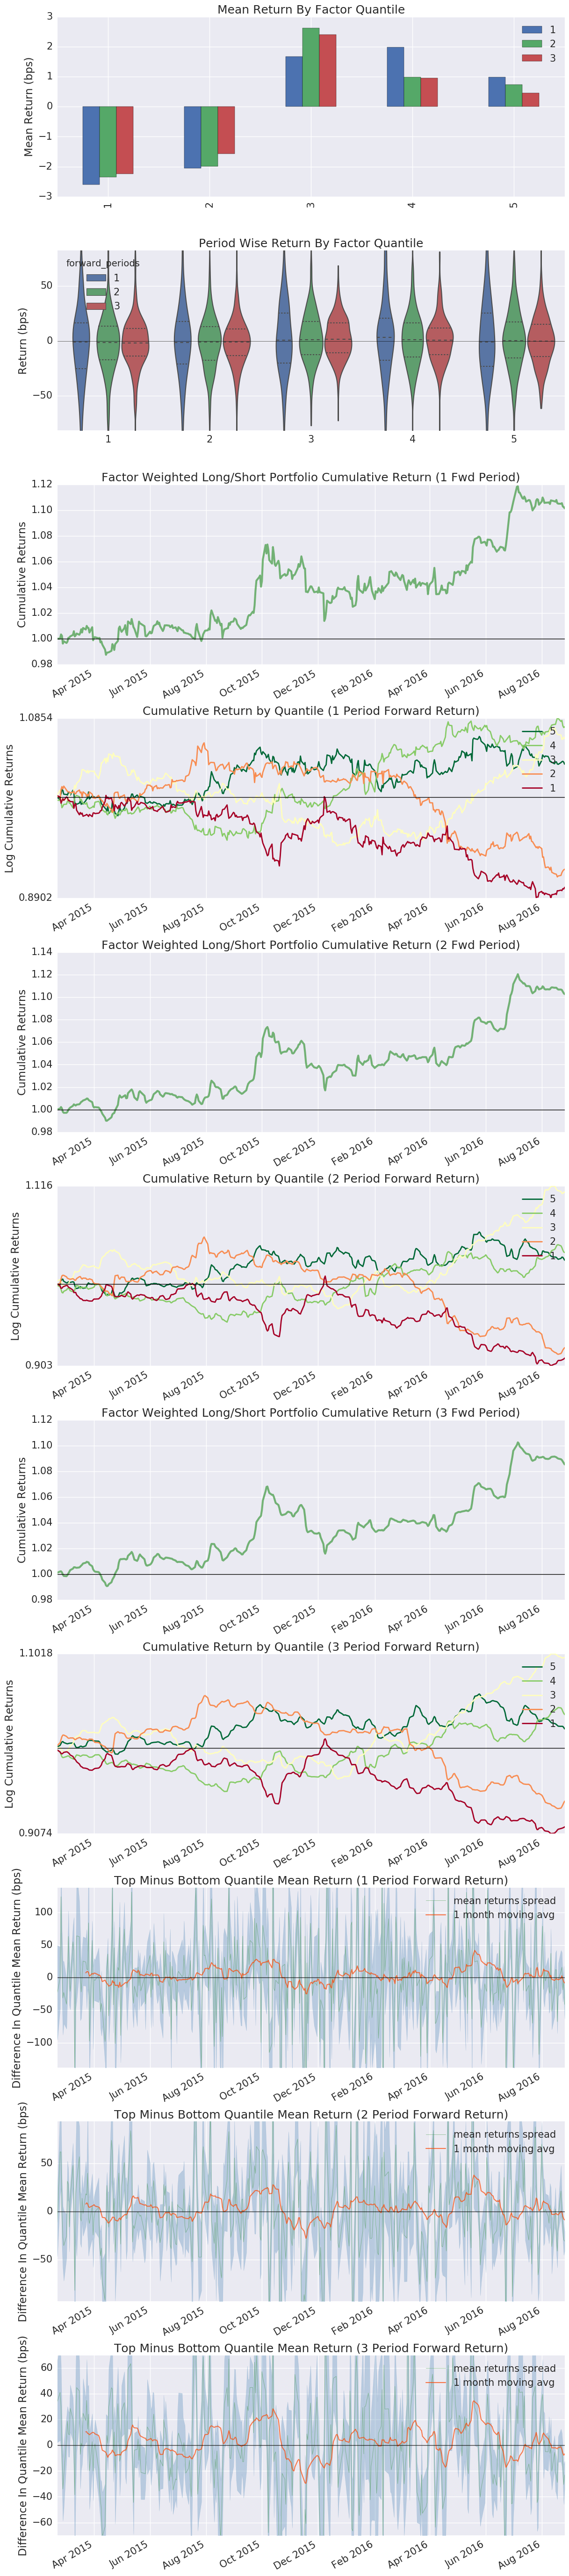

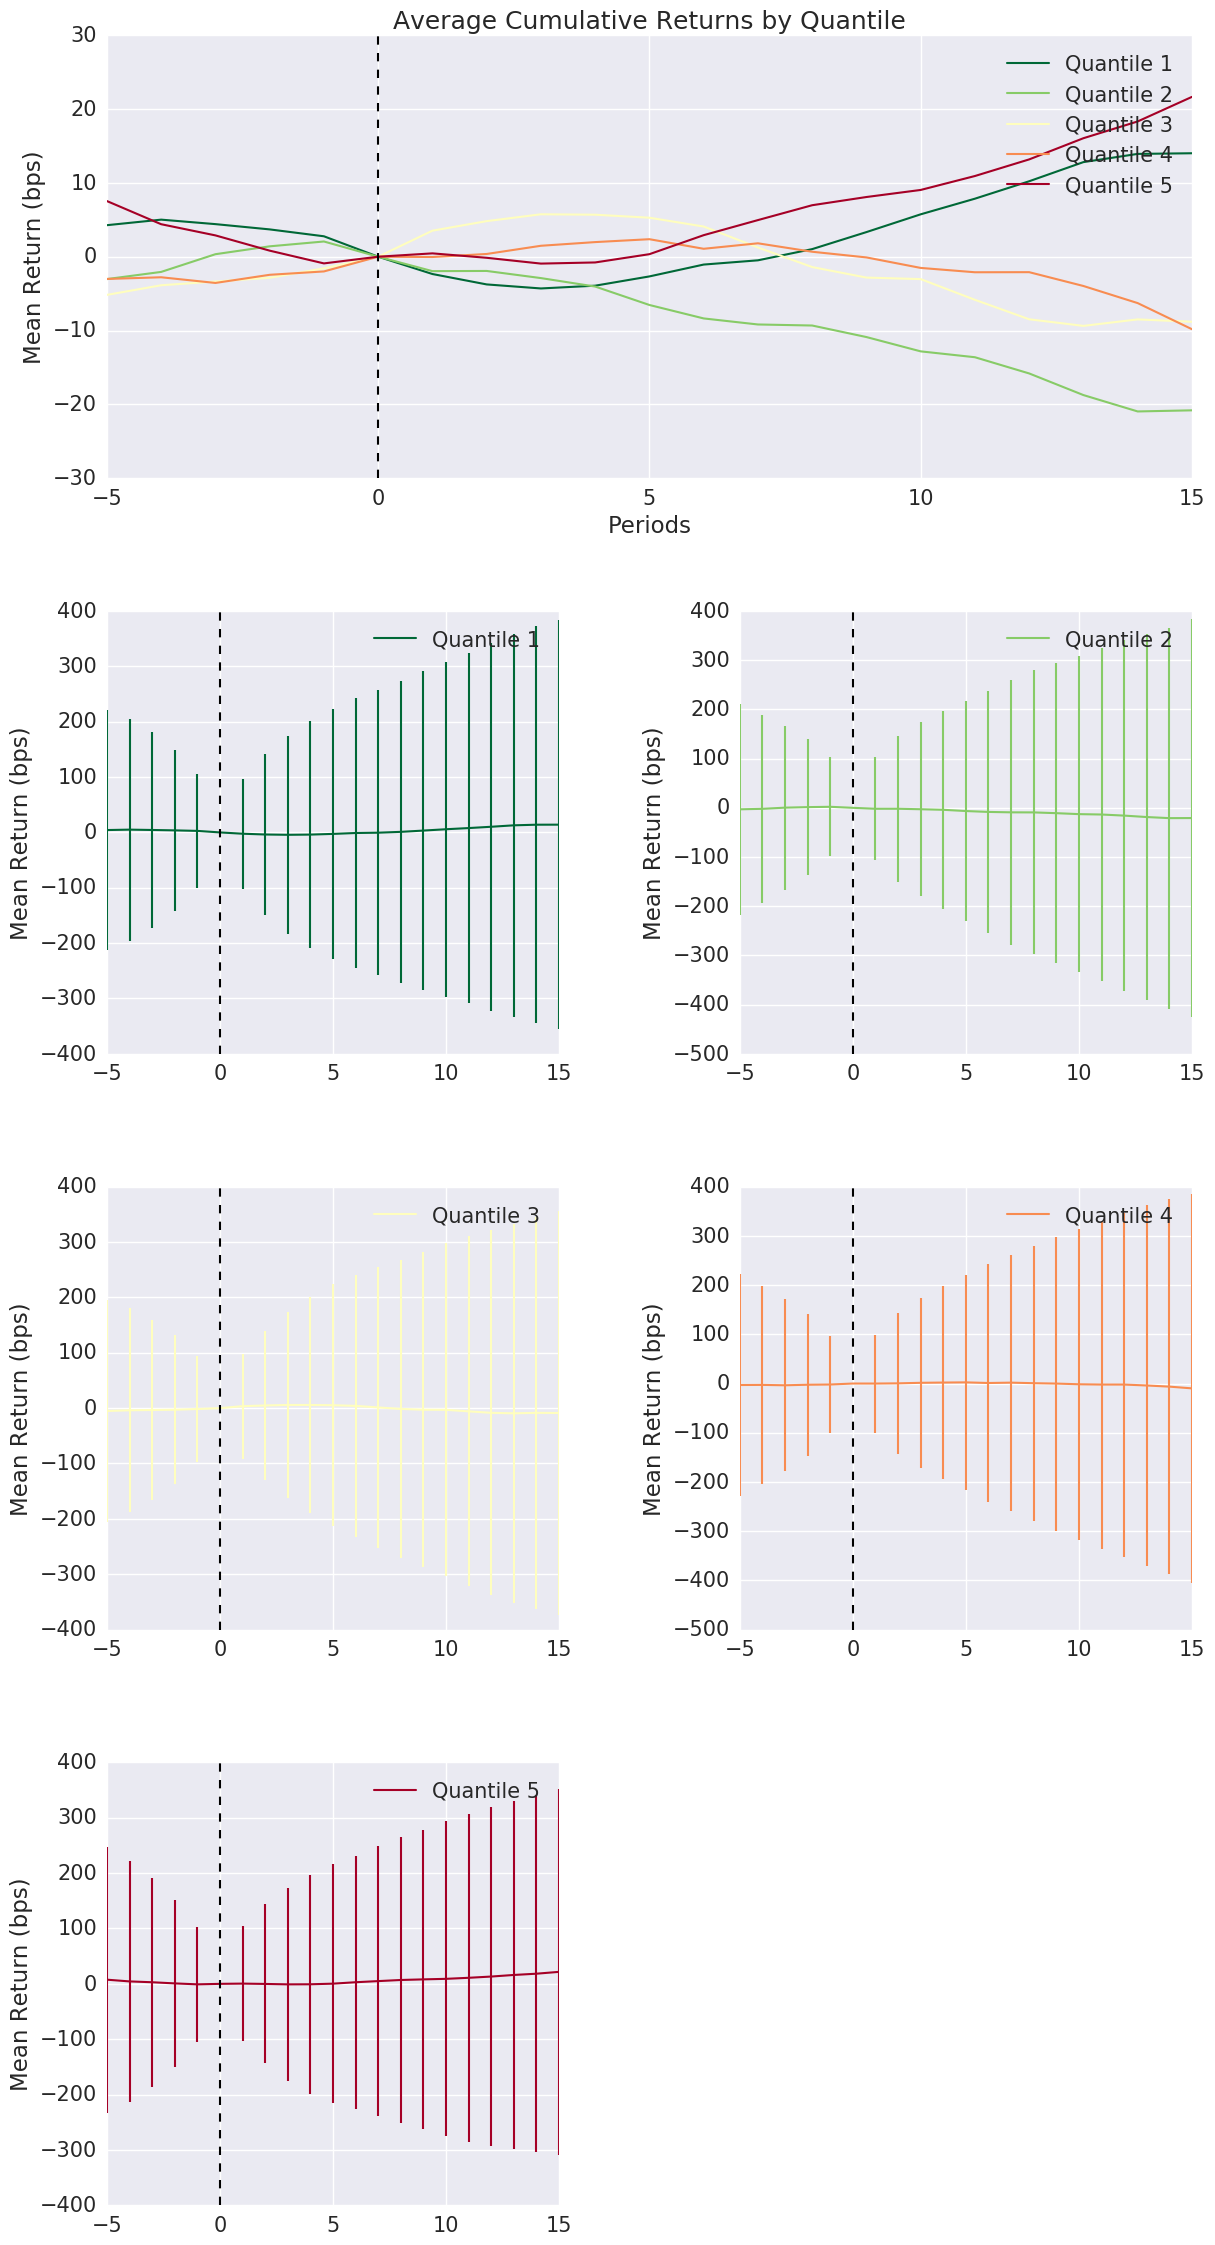

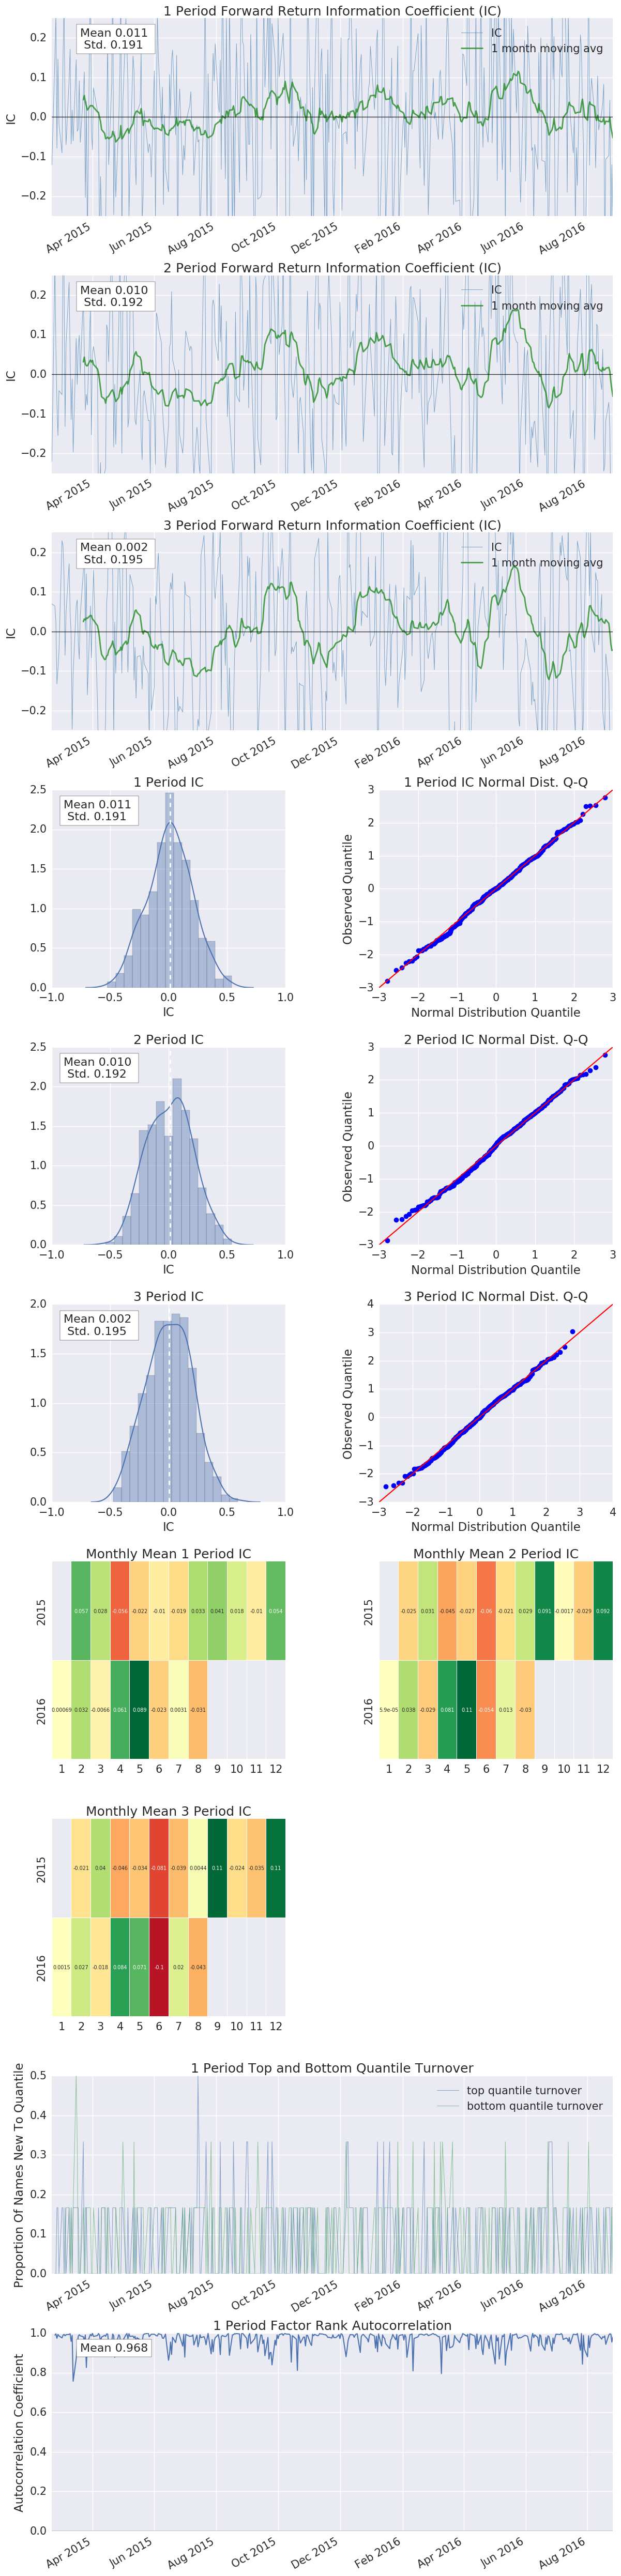

In [14]:
alphalens.tears.create_factor_tear_sheet( \
        factor=seSig, \
        prices=dfPrice,periods=(1,2,3))